In [1]:
#Pca Wine Analysis

Principal Component Analysis (PCA) -
A statistical method that transforms high-dimensional data into a lower-dimensional space by creating new, uncorrelated variables.

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [3]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")


In [4]:
#Exploratory Data Analysis (EDA)
# Load dataset
wine = pd.read_csv("C:\\Users\\Downloads\\PCA\\wine.csv")

In [5]:
print("Data Shape:", wine.shape)

Data Shape: (178, 14)


In [6]:
print("\nData Info:")
print(wine.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [7]:
print("\nSummary Statistics:")
print(wine.describe())


Summary Statistics:
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851 

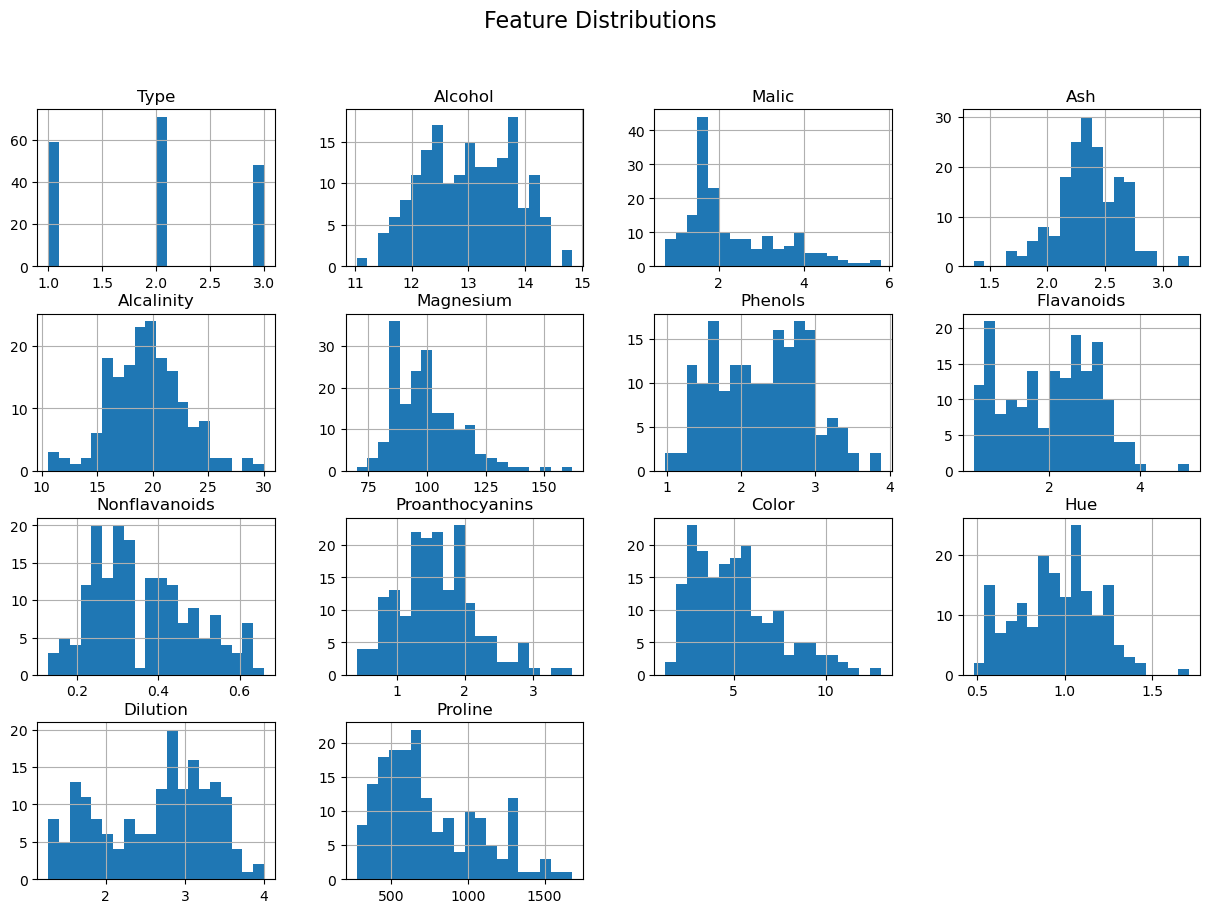

In [8]:
# Visualizations
# Histograms
wine.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

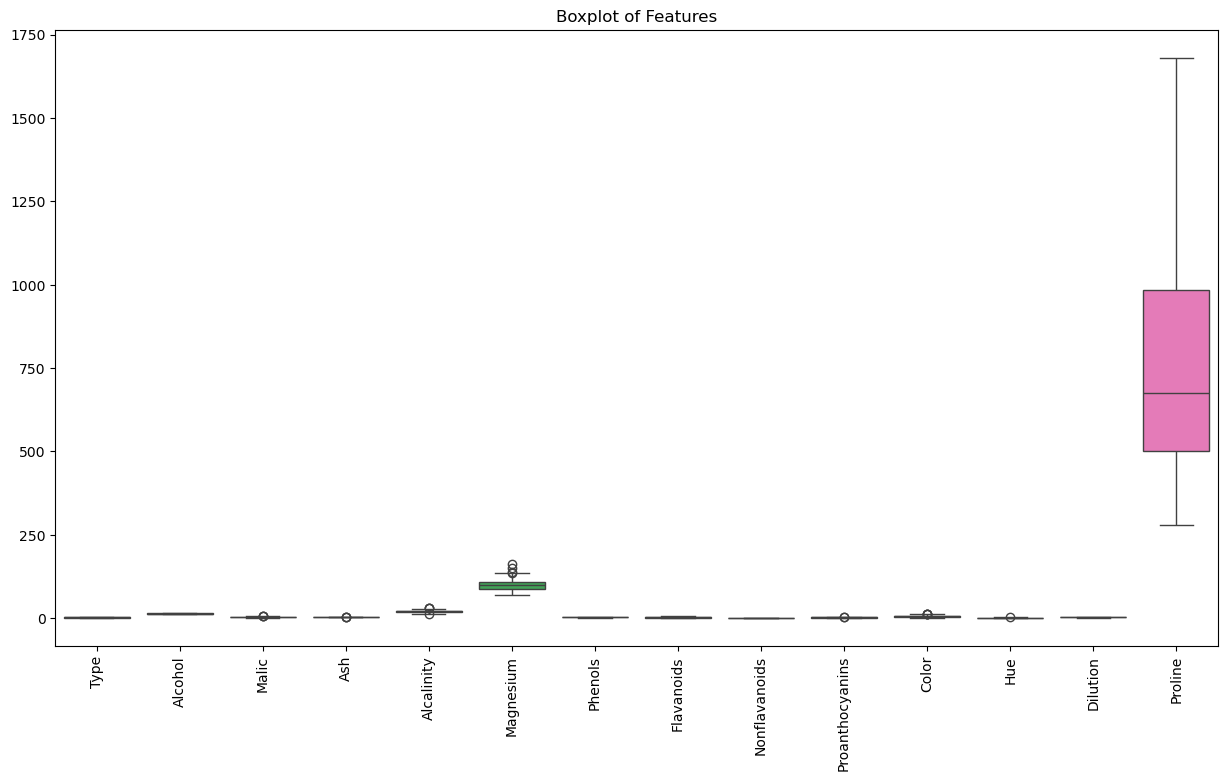

In [9]:
# Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=wine)
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()

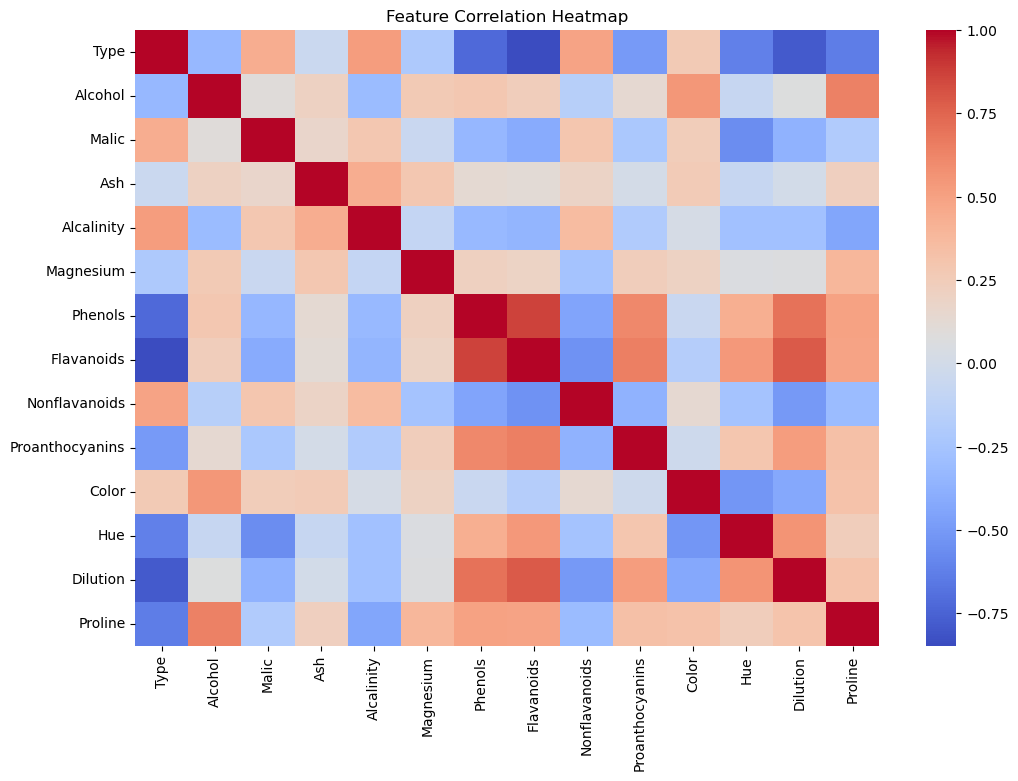

In [10]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(wine.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
# Dimensionality Reduction with PCA
# Standardize features
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine)

In [12]:
# Apply PCA
pca = PCA()
pca_components = pca.fit_transform(wine_scaled)

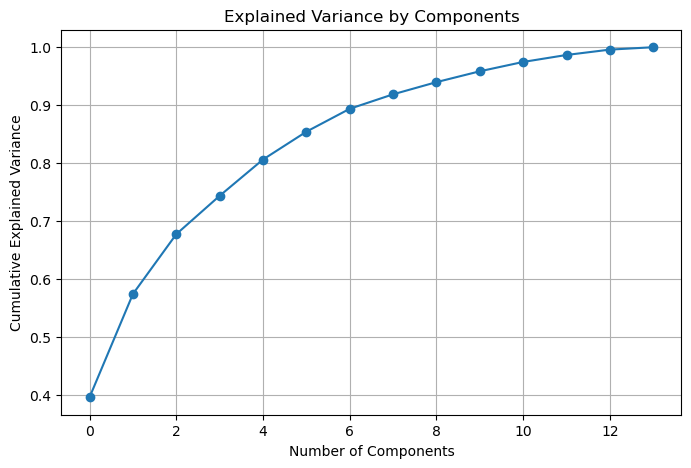

In [13]:
# Scree plot (explained variance)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid()
plt.show()

In [14]:
# Decide optimal number of components (e.g., 2 for visualization)
optimal_pcs = 2
pca = PCA(n_components=optimal_pcs)
pca_data = pca.fit_transform(wine_scaled)

In [15]:
# Clustering with Original Data
# KMeans clustering
kmeans_orig = KMeans(n_clusters=3, random_state=42)
kmeans_orig_labels = kmeans_orig.fit_predict(wine_scaled)

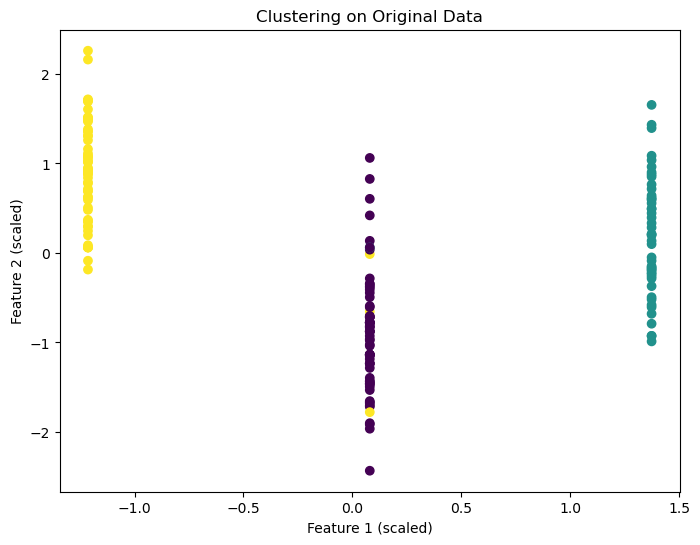

In [16]:
# Visualization with first 2 features
plt.figure(figsize=(8, 6))
plt.scatter(wine_scaled[:, 0], wine_scaled[:, 1], c=kmeans_orig_labels, cmap='viridis')
plt.title("Clustering on Original Data")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

In [17]:
# Evaluation
print("Original Data Silhouette Score:", silhouette_score(wine_scaled, kmeans_orig_labels))
print("Original Data Davies-Bouldin Index:", davies_bouldin_score(wine_scaled, kmeans_orig_labels))

Original Data Silhouette Score: 0.30648398324833453
Original Data Davies-Bouldin Index: 1.315707552261773


In [18]:
# Clustering with PCA Data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(pca_data)


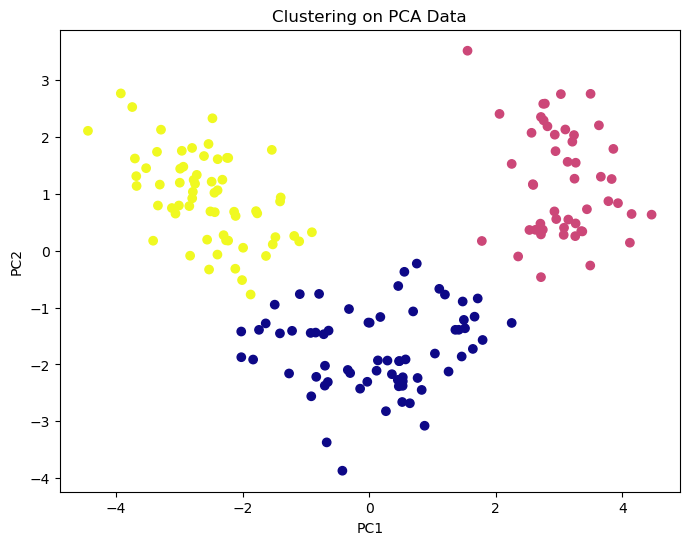

In [19]:
# Visualization on PCA data
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_pca_labels, cmap='plasma')
plt.title("Clustering on PCA Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [20]:
# Evaluation
print("PCA Data Silhouette Score:", silhouette_score(pca_data, kmeans_pca_labels))
print("PCA Data Davies-Bouldin Index:", davies_bouldin_score(pca_data, kmeans_pca_labels))

PCA Data Silhouette Score: 0.6024415520362845
PCA Data Davies-Bouldin Index: 0.5397078562575711


In [21]:
# Comparison and Analysis
print("\nComparison of Clustering Results:")
print("- Original Data: Silhouette =", silhouette_score(wine_scaled, kmeans_orig_labels),
", DB Index =", davies_bouldin_score(wine_scaled, kmeans_orig_labels))
print("- PCA Data: Silhouette =", silhouette_score(pca_data, kmeans_pca_labels),
", DB Index =", davies_bouldin_score(pca_data, kmeans_pca_labels))
print("\nAnalysis:")
print("Using PCA often simplifies visualization and reduces noise. If PCA-based clustering gives similar or better scores, it means dimensionality reduction was beneficial. Otherwise, the original dataset may preserve more cluster information.")


Comparison of Clustering Results:
- Original Data: Silhouette = 0.30648398324833453 , DB Index = 1.315707552261773
- PCA Data: Silhouette = 0.6024415520362845 , DB Index = 0.5397078562575711

Analysis:
Using PCA often simplifies visualization and reduces noise. If PCA-based clustering gives similar or better scores, it means dimensionality reduction was beneficial. Otherwise, the original dataset may preserve more cluster information.


Conclusion 
- PCA helped reduce dimensionality and made visualization easier.
- Clustering results can slightly change after PCA depending on explained variance retained.
- PCA is useful when features are highly correlated or dataset is high-dimensional. For small datasets with meaningful features, clustering directly may work as well.